## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

#group data by Drug Regimen
combined_stats = combined_data.groupby("Drug Regimen")

#Calculate the summary statistics, put into a data frame, rename column
mean_tumor = pd.DataFrame(combined_stats["Tumor Volume (mm3)"].mean())
mean_tumor.rename(columns = {'Tumor Volume (mm3)':'Mean Volume'}, inplace = True)
median_tumor = pd.DataFrame(combined_stats["Tumor Volume (mm3)"].median())
median_tumor.rename(columns = {'Tumor Volume (mm3)':'Median Volume'}, inplace = True)
std_tumor = pd.DataFrame(combined_stats["Tumor Volume (mm3)"].std())
std_tumor.rename(columns = {'Tumor Volume (mm3)':'Standard Deviation'}, inplace = True)
variance_tumor = pd.DataFrame(combined_stats["Tumor Volume (mm3)"].var())
variance_tumor.rename(columns = {'Tumor Volume (mm3)':'Variance'}, inplace = True)
sem_tumor = pd.DataFrame(combined_stats["Tumor Volume (mm3)"].sem())
sem_tumor.rename(columns = {'Tumor Volume (mm3)':'SEM'}, inplace = True)

#createn a new dataframe; merge all data together
summary_stats = mean_tumor
summary_stats = pd.merge(summary_stats, median_tumor, left_index=True, right_index=True)
summary_stats = pd.merge(summary_stats, variance_tumor, left_index=True, right_index=True)
summary_stats = pd.merge(summary_stats, std_tumor, left_index=True, right_index=True)
summary_stats = pd.merge(summary_stats, sem_tumor, left_index=True, right_index=True)

#show the results
display(summary_stats)

,Mean Volume,Median Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

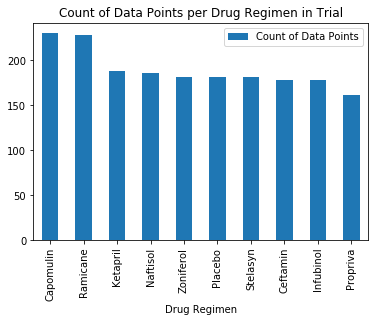

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Start with all data in a table, combined_data from previous steps

# organize the data to get a count of the data points
pd_bar_plot = combined_data[["Drug Regimen","Timepoint"]]
pd_bar_plot = pd_bar_plot.groupby("Drug Regimen")
pd_bar_plot = pd.DataFrame(pd_bar_plot["Timepoint"].count())
pd_bar_plot = pd_bar_plot.rename(columns = {"Timepoint":"Count of Data Points"})
pd_bar_plot = pd_bar_plot.sort_values(by="Count of Data Points", ascending=False)

# plot into bar chart
pd_bar_plot.plot(kind="bar")
plt.title("Count of Data Points per Drug Regimen in Trial")
plt.show()

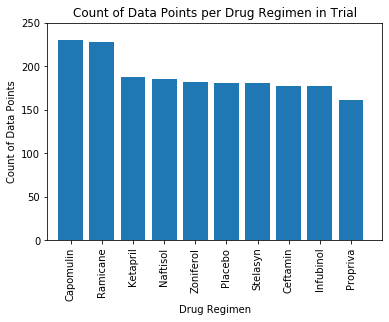

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Start with all data in a table, combined_data from previous steps

# group the data and count the number of lines per regimen
mpl_bar_plot = combined_data[["Drug Regimen","Timepoint"]]
mpl_bar_plot = mpl_bar_plot.groupby("Drug Regimen")
mpl_bar_plot = pd.DataFrame(mpl_bar_plot["Timepoint"].count())
mpl_bar_plot.rename(columns = {'Timepoint':'Count of Data Points'}, inplace=True)
mpl_bar_plot = mpl_bar_plot.reset_index()
mpl_bar_plot = mpl_bar_plot.sort_values(by=["Count of Data Points"], ascending=False)

# set the x-axis and tick labels
#from matplotlib Day 2 - Activity 2
xaxis = np.arange(len(mpl_bar_plot))
ticks = [value for value in xaxis]

# create the bar plot, set the labels, make it looks like a million bucks
plt.bar(xaxis, mpl_bar_plot["Count of Data Points"])
plt.xticks(ticks, mpl_bar_plot["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Data Points")
plt.title("Count of Data Points per Drug Regimen in Trial")
plt.xlim(-0.75, len(xaxis))
plt.ylim(0,250)
plt.show()

## Pie plots

C:\Users\katie\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


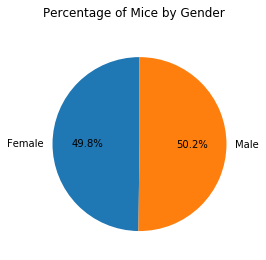

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = combined_data
gender_data = gender_data.drop_duplicates(subset=["Mouse ID"])
gender_data = gender_data[["Mouse ID","Sex"]]
gender_data = gender_data.groupby("Sex").count()
gender_data = gender_data.rename(columns = {"Mouse ID":"Count"})
gender_data.plot(kind="pie", title = "Percentage of Mice by Gender", subplots=True, legend=False, autopct="%1.1f%%", startangle=90)
plt.axes().set_ylabel('')
plt.show()

# How to remove y-label found here https://stackoverflow.com/questions/34094596/python-matplotlib-pyplot-pie-charts-how-to-remove-the-label-on-the-left-side



C:\Users\katie\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


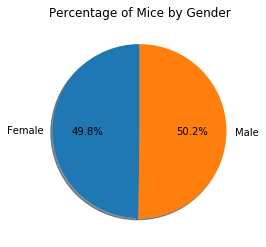

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
plt.pie(gender_data, autopct="%1.1f%%", labels=labels,shadow=True, startangle=90)
plt.title("Percentage of Mice by Gender")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most 
# promising treatment regimens. Calculate the IQR and 
# quantitatively determine if there are any potential outliers.
# Capomulin, Ramicane, Infubinol, and Ceftamin.

# Capomulin
cap_data = combined_data
cap_data = cap_data[(cap_data["Drug Regimen"] == "Capomulin")] 
cap_data

cap_data_last = cap_data.sort_values(by=["Timepoint"], ascending=False)
cap_data_last = cap_data_last.drop_duplicates(subset=["Mouse ID"])
cap_data_last = cap_data_last[["Mouse ID","Tumor Volume (mm3)"]]
cap_data_last = cap_data_last.rename(columns = {"Tumor Volume (mm3)":"Final Tumor Volume"})
cap_data_last = pd.DataFrame(cap_data_last["Final Tumor Volume"])
cap_data_numbers = cap_data_last["Final Tumor Volume"]
cap_data_numbers

# Based on Matplotlib lessonplan Day 3 - Activity 2

cap_quartiles = cap_data_numbers.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lb = cap_lowerq - (1.5*cap_iqr)
cap_ub = cap_upperq + (1.5*cap_iqr)
print("-----------------------------------------")
print(f"Capomulin")
print("-----------------------------------------")
print(f"Lower Quartile:{cap_lowerq}")
print(f"Upper Quartile:{cap_upperq}")
print(f"IQR:{cap_iqr}")
print(f"Lower Bound:{cap_lb}")
print(f"Upper Bound:{cap_ub}")
cap_lb = cap_lb.astype("float")
cap_po = cap_data_last[(cap_data_last["Final Tumor Volume"] < cap_lb) | (cap_data_last["Final Tumor Volume"] > cap_ub)]
cap_po = cap_po.rename(columns = {"Final Tumor Volume":"Capomulin Potential Outlier Values"})
display(cap_po)
print("-----------------------------------------")

# Ramicane
ram_data = combined_data
ram_data = ram_data[(ram_data["Drug Regimen"] == "Ramicane")] 
ram_data

ram_data_last = ram_data.sort_values(by=["Timepoint"], ascending=False)
ram_data_last = ram_data_last.drop_duplicates(subset=["Mouse ID"])
ram_data_last = ram_data_last[["Mouse ID","Tumor Volume (mm3)"]]
ram_data_last = ram_data_last.rename(columns = {"Tumor Volume (mm3)":"Final Tumor Volume"})
ram_data_last = pd.DataFrame(ram_data_last["Final Tumor Volume"])
ram_data_numbers = ram_data_last["Final Tumor Volume"]
ram_data_numbers

ram_quartiles = ram_data_numbers.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lb = ram_lowerq - (1.5*ram_iqr)
ram_ub = ram_upperq + (1.5*ram_iqr)
print("-----------------------------------------")
print(f"Ramicane")
print("-----------------------------------------")
print(f"Lower Quartile:{ram_lowerq}")
print(f"Upper Quartile:{ram_upperq}")
print(f"IQR:{ram_iqr}")
print(f"Lower Bound:{ram_lb}")
print(f"Upper Bound:{ram_ub}")
ram_lb = ram_lb.astype("float")
ram_po = ram_data_last[(ram_data_last["Final Tumor Volume"] < ram_lb) | (ram_data_last["Final Tumor Volume"] > ram_ub)]
ram_po = ram_po.rename(columns = {"Final Tumor Volume":"Ramicane Potential Outlier Values"})
display(ram_po)
print("-----------------------------------------")

# Infubinol
inf_data = combined_data
inf_data = inf_data[(inf_data["Drug Regimen"] == "Infubinol")] 
inf_data

inf_data_last = inf_data.sort_values(by=["Timepoint"], ascending=False)
inf_data_last = inf_data_last.drop_duplicates(subset=["Mouse ID"])
inf_data_last = inf_data_last[["Mouse ID","Tumor Volume (mm3)"]]
inf_data_last = inf_data_last.rename(columns = {"Tumor Volume (mm3)":"Final Tumor Volume"})
inf_data_last = pd.DataFrame(inf_data_last["Final Tumor Volume"])
inf_data_numbers = inf_data_last["Final Tumor Volume"]
inf_data_numbers

inf_quartiles = inf_data_numbers.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lb = inf_lowerq - (1.5*inf_iqr)
inf_ub = inf_upperq + (1.5*inf_iqr)
print("-----------------------------------------")
print(f"Infubinol")
print("-----------------------------------------")
print(f"Lower Quartile:{inf_lowerq}")
print(f"Upper Quartile:{inf_upperq}")
print(f"IQR:{inf_iqr}")
print(f"Lower Bound:{inf_lb}")
print(f"Upper Bound:{inf_ub}")
inf_lb = inf_lb.astype("float")
inf_po = inf_data_last[(inf_data_last["Final Tumor Volume"] < inf_lb) | (inf_data_last["Final Tumor Volume"] > inf_ub)]
inf_po = inf_po.rename(columns = {"Final Tumor Volume":"Infubinol Potential Outlier Values"})
display(inf_po)
print("-----------------------------------------")

# Ceftamin

cef_data = combined_data
cef_data = cef_data[(cef_data["Drug Regimen"] == "Ceftamin")] 
cef_data

cef_data_last = cef_data.sort_values(by=["Timepoint"], ascending=False)
cef_data_last = cef_data_last.drop_duplicates(subset=["Mouse ID"])
cef_data_last = cef_data_last[["Mouse ID","Tumor Volume (mm3)"]]
cef_data_last = cef_data_last.rename(columns = {"Tumor Volume (mm3)":"Final Tumor Volume"})
cef_data_last = pd.DataFrame(cef_data_last["Final Tumor Volume"])
cef_data_numbers = cef_data_last["Final Tumor Volume"]
cef_data_numbers

cef_quartiles = cef_data_numbers.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq
cef_lb = cef_lowerq - (1.5*cef_iqr)
cef_ub = cef_upperq + (1.5*cef_iqr)
print("-----------------------------------------")
print(f"Ceftamin")
print("-----------------------------------------")
print(f"Lower Quartile:{cef_lowerq}")
print(f"Upper Quartile:{cef_upperq}")
print(f"IQR:{cef_iqr}")
print(f"Lower Bound:{cef_lb}")
print(f"Upper Bound:{cef_ub}")
cef_lb = cef_lb.astype("float")
cef_po = cef_data_last[(cef_data_last["Final Tumor Volume"] < cef_lb) | (cef_data_last["Final Tumor Volume"] > cef_ub)]
cef_po = cef_po.rename(columns = {"Final Tumor Volume":"Ceftamin Potential Outlier Values"})
display(cef_po)
print("-----------------------------------------")

-----------------------------------------
Capomulin
-----------------------------------------
Lower Quartile:32.37735684
Upper Quartile:40.1592203
IQR:7.781863460000004
Lower Bound:20.70456164999999
Upper Bound:51.83201549


,Capomulin Potential Outlier Values


-----------------------------------------
-----------------------------------------
Ramicane
-----------------------------------------
Lower Quartile:31.56046955
Upper Quartile:40.65900627
IQR:9.098536719999998
Lower Bound:17.912664470000003
Upper Bound:54.30681135


,Ramicane Potential Outlier Values


-----------------------------------------
-----------------------------------------
Infubinol
-----------------------------------------
Lower Quartile:54.04860769
Upper Quartile:65.52574285
IQR:11.477135160000003
Lower Bound:36.83290494999999
Upper Bound:82.74144559000001


,Infubinol Potential Outlier Values
669,36.321346


-----------------------------------------
-----------------------------------------
Ceftamin
-----------------------------------------
Lower Quartile:48.72207785
Upper Quartile:64.29983003
IQR:15.577752179999997
Lower Bound:25.355449580000002
Upper Bound:87.66645829999999


,Ceftamin Potential Outlier Values


-----------------------------------------


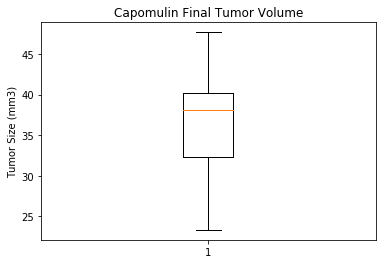

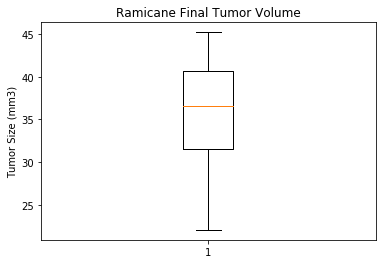

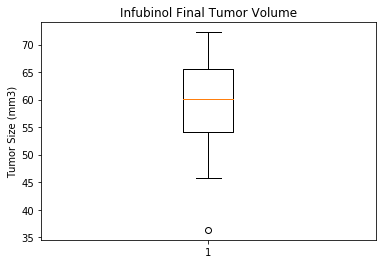

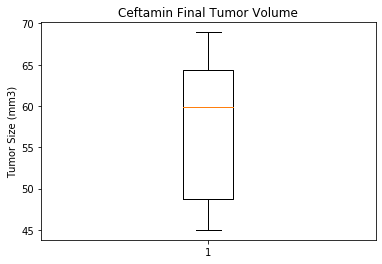

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap_box = cap_data_last["Final Tumor Volume"]
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Final Tumor Volume')
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(cap_box)
plt.show()

ram_box = ram_data_last["Final Tumor Volume"]
fig2, ax2 = plt.subplots()
ax2.set_title('Ramicane Final Tumor Volume')
ax2.set_ylabel('Tumor Size (mm3)')
ax2.boxplot(ram_box)
plt.show()

inf_box = inf_data_last["Final Tumor Volume"]
fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol Final Tumor Volume')
ax3.set_ylabel('Tumor Size (mm3)')
ax3.boxplot(inf_box)
plt.show()

cef_box = cef_data_last["Final Tumor Volume"]
fig4, ax4 = plt.subplots()
ax4.set_title('Ceftamin Final Tumor Volume')
ax4.set_ylabel('Tumor Size (mm3)')
ax4.boxplot(cef_box)
plt.show()

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen